In [1]:
'''图像的取样'''
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mig


In [2]:
#读取图像
imag = mig.imread(r'C:\Users\23282\Desktop\PyL\DIP\imageset\boy.tif')
print(imag)
print(np.shape(imag))   #查看图像大小
print(imag.shape[0])    #图像的垂直尺寸（高度）
print(imag.shape[1])    #图像的水平尺寸（宽度）
# print(imag.shape[2])    #图像的通道数    
print(type(imag))       #查看图像类型


[[ 83  98  96 ... 111 117 105]
 [ 73  77  83 ... 121 156 116]
 [ 73  75  77 ... 109 123 113]
 ...
 [ 88 117 136 ...  54  46  52]
 [ 86 124 148 ...  55  50  49]
 [ 95 100 110 ...  47  42  44]]
(688, 600)
688
600
<class 'numpy.ndarray'>


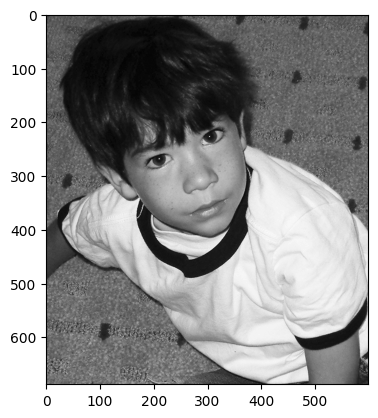

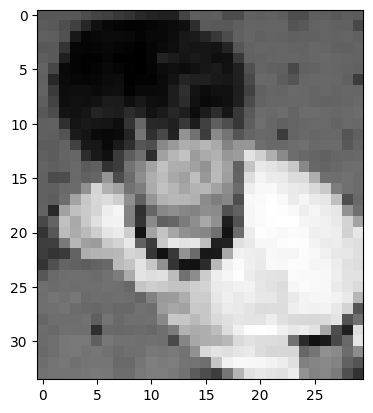

In [3]:
ratio = 20   #采样比率，即采样间隔，值越大，所得的图像像素越少
#创建一个空矩阵，用于存放采样后的图片
imag1 = np.zeros((int(imag.shape[0]/ratio),int(imag.shape[1]/ratio)))

#对图像进行遍历
for i in range(imag1.shape[0]):
    for j in range(imag1.shape[1]): 
        delta = imag[i*ratio : (i+1)*ratio, j*ratio : (j+1)*ratio]  #获取所需采样的图像块

        imag1[i,j] = np.mean(delta)   #计算均值填入空矩阵，得到采样后的图片
        
plt.imshow(imag,cmap='gray')  #显示原图像   cmap 参数用于控制颜色图谱
plt.show()
plt.imshow(imag1,cmap='gray')  #显示采样后的图像
plt.show()

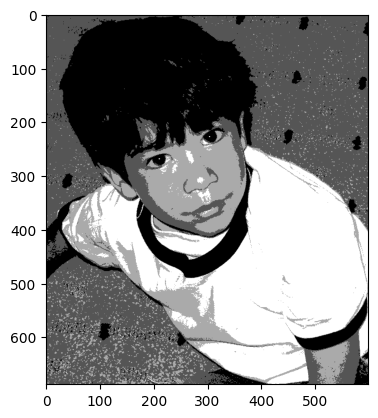

[[ 64  64  64 ...  64  64  64]
 [ 64  64  64 ...  64 128  64]
 [ 64  64  64 ...  64  64  64]
 ...
 [ 64  64 128 ...   0   0   0]
 [ 64  64 128 ...   0   0   0]
 [ 64  64  64 ...   0   0   0]]


In [4]:
'''图像量化'''
#采样后所得的各像素的灰度值从连续量到离散量的转换，称为图像灰度的量化
imag2 = np.copy(imag)
#设置量化比率
ratio2 = 64       #将原来256级灰度的图像转换成仅有4级灰度的图像

for i in range(imag2.shape[0]):
    for j in range(imag2.shape[1]):
            imag2[i][j] = int(imag2[i][j]/ratio2)*ratio2  #针对每个像素进行量化

plt.imshow(imag2,cmap='gray')
plt.show()       #打印采样后的图像
print(imag2)

C:\Users\23282\AppData\Local\Temp\ipykernel_13140\1769255373.py:4: RuntimeWarning: divide by zero encountered in divide
  imagdiv = imag/imag2        #图像相除
C:\Users\23282\AppData\Local\Temp\ipykernel_13140\1769255373.py:4: RuntimeWarning: invalid value encountered in divide
  imagdiv = imag/imag2        #图像相除


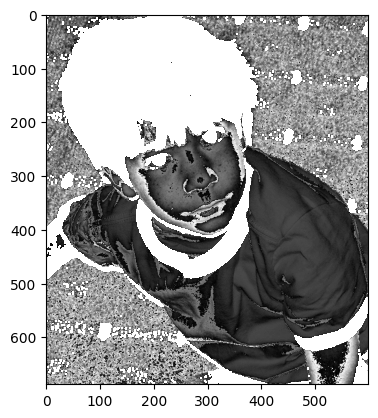

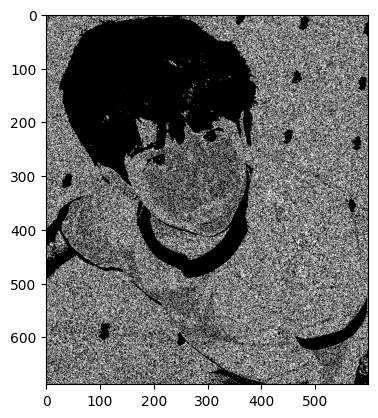

In [5]:
'''图像的算数运算'''
imagminu = imag-imag2        #图像相减
imagpls = imag+imag2        #图像相加
imagdiv = imag/imag2        #图像相除
imagpro =imag * imag2        #图像相乘     
# plt.imshow(imagminu,cmap='gray')
# plt.show()
# plt.imshow(imagpls,cmap='gray')
# plt.show()
plt.imshow(imagdiv,cmap='gray')
plt.show()
plt.imshow(imagpro,cmap='gray')
plt.show()

In [6]:
'''利用图像平均来消除噪声的影响'''
#给图像pict添加随机噪声，生成num幅,保存在Lst列表里
def plusnoise(pict,Lst,num):
    
    for i in range(num):
        n = np.random.randn(688,600)     #图像尺寸与噪声图像尺寸相同
        noise = np.array(n*100,dtype='int32')
        Lst.append(pict+noise)
    return Lst

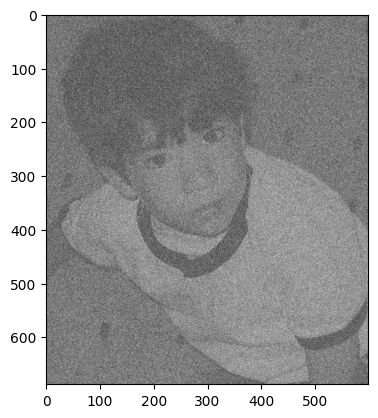

In [7]:
lst = []
#生成50幅噪声图像
nislst = plusnoise(imag,lst,50)

plt.imshow(nislst[2],cmap='gray')  #输出其中一副噪声图像
plt.show()

def aveimage(Lst,num):          #对列表中的num个图像取平均
    sumimg= np.zeros((688,600))
    for i in range(5):
        sumimg += Lst[i]
    aveimg = sumimg/5
    plt.imshow(aveimg,cmap='gray')
    plt.show()

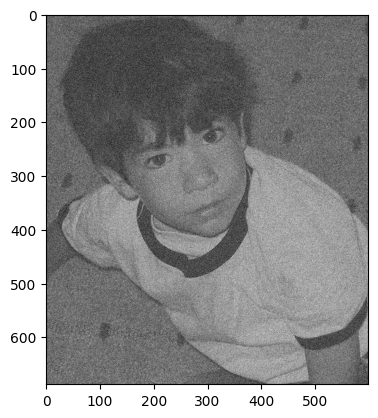

In [8]:
aveimage(nislst,50)  #对50幅含随机噪声图像求平均，可见噪声有一定程度的降低